# Compare $U_n$ and $U_p$ functions

Andrew Weng
2023/04/27

In [1]:
import os, sys

# Move the path up a level to be able to index into source files
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import pandas as pd
import numpy as np
import yaml
from src import cellsim as cellsim
from src import modelutils as mu
import matplotlib.pyplot as plt
%matplotlib widget
%load_ext autoreload


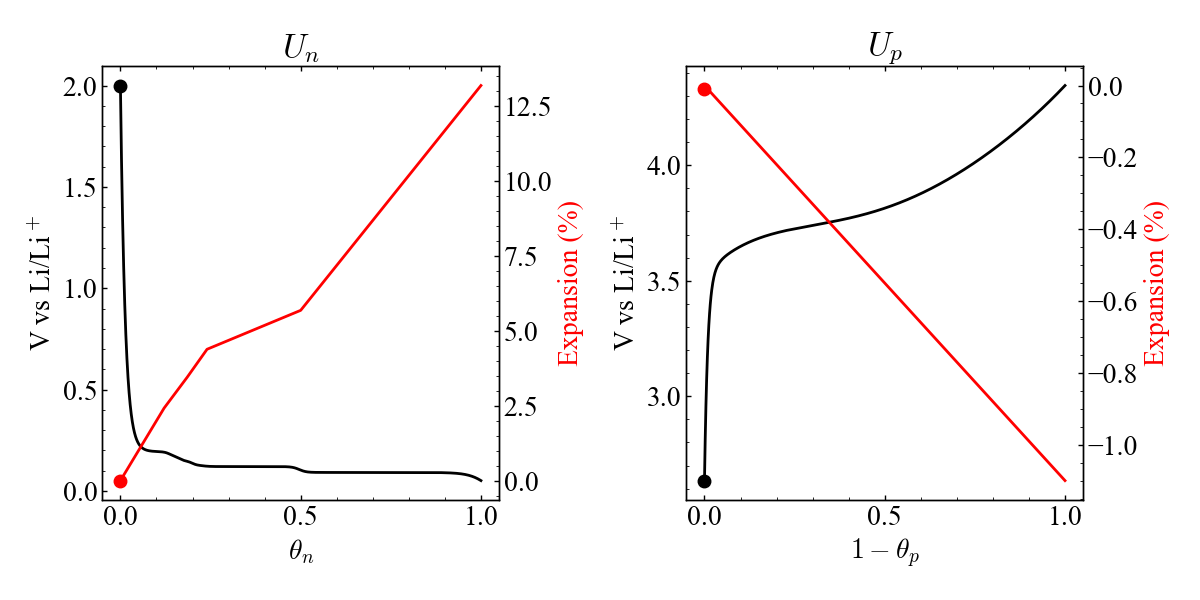

In [2]:
xx = np.linspace(0, 1, 1000)


Un = [mu.Un(x) for x in xx]
En = [mu.En(x) for x in xx]
Up = [mu.Up(x) for x in xx]
Ep = [mu.Ep(x) for x in xx]

fh, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].plot(xx, Un, c='k')
axs[0].plot(0, Un[0], label='I.C.', marker='o', c='k', ms=9)
axs[0].grid(False)
axs[0].set_title('$U_n$')
axs[0].set_xlabel(r'$\theta_n$')
axs[0].set_ylabel('V vs Li/Li$^+$')

ax2 = axs[0].twinx()
ax2.plot(xx, np.array(En)*100, c='r')
ax2.plot(0, np.array(En)[0], label='', marker='o', c='r', ms=9)
ax2.grid(False)
ax2.set_ylabel('Expansion (%)', color='r')

axs[1].plot(1-xx, Up, c='k')
axs[1].plot(0, Up[-1], label='I.C.', marker='o', c='k', ms=9)
axs[1].grid(False)
axs[1].set_title('$U_p$')
axs[1].set_xlabel(r'$1-\theta_p$')
axs[1].set_ylabel('V vs Li/Li$^+$')

ax2 = axs[1].twinx()
ax2.plot(1-xx, np.array(Ep)*100, c='r')
ax2.plot(0, np.array(Ep)[1], label='', marker='o', ms=9, c='r')
ax2.grid(False)
ax2.set_ylabel('Expansion (%)', color='r')

plt.savefig(f'outputs/figures/fig_ocp.png', dpi=150)


# Caution! Choice of $U_p$ and $U_n$ functions matters.

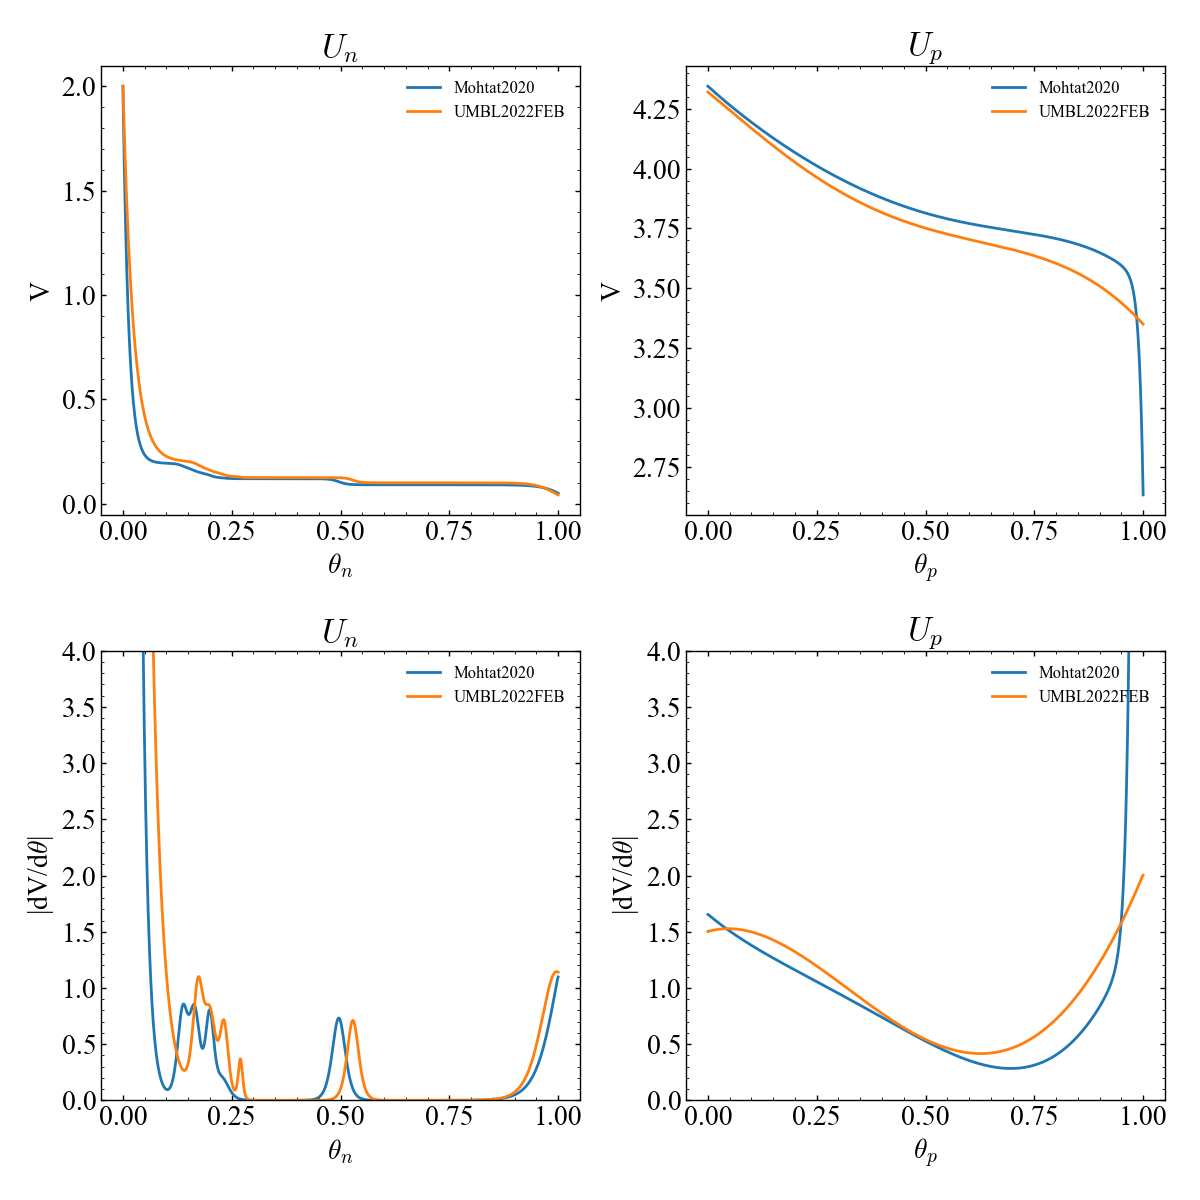

In [3]:
%autoreload

xx = np.linspace(0, 1, 1000)


Un = [mu.Un(x) for x in xx]
Up = [mu.Up(x) for x in xx]
Un2 = mu.UnGr(xx)
Up2 = mu.UpNMC622(xx)

fh, axs = plt.subplots(2, 2, figsize=(12,12))

axs[0,0].plot(xx, Un, label='Mohtat2020')
axs[0,0].plot(xx, Un2, label='UMBL2022FEB')
axs[0,0].grid(False)
axs[0,0].set_title('$U_n$')
axs[0,0].set_xlabel(r'$\theta_n$')
axs[0,0].set_ylabel('V')
axs[0,0].legend(loc='upper right', fontsize=12)
axs[0,1].plot(xx, Up, label='Mohtat2020')
axs[0,1].plot(xx, Up2, label='UMBL2022FEB')
axs[0,1].grid(False)
axs[0,1].set_title('$U_p$')
axs[0,1].set_xlabel(r'$\theta_p$')
axs[0,1].set_ylabel('V')
axs[0,1].legend(loc='upper right', fontsize=12)

axs[1,0].plot(xx, np.abs(np.gradient(Un)/np.gradient(xx)), label='Mohtat2020')
axs[1,0].plot(xx, np.abs(np.gradient(Un2)/np.gradient(xx)), label='UMBL2022FEB')
axs[1,0].grid(False)
axs[1,0].set_title('$U_n$')
axs[1,0].set_xlabel(r'$\theta_n$')
axs[1,0].set_ylabel(r'|dV/d$\theta$|')
axs[1,0].legend(loc='upper right', fontsize=12)
axs[1,0].set_ylim((0, 4))
axs[1,1].plot(xx, np.abs(np.gradient(Up)/np.gradient(xx)), label='Mohtat2020')
axs[1,1].plot(xx, np.abs(np.gradient(Up2)/np.gradient(xx)), label='UMBL2022FEB')
axs[1,1].grid(False)
axs[1,1].set_title('$U_p$')
axs[1,1].set_xlabel(r'$\theta_p$')
axs[1,1].set_ylabel(r'|dV/d$\theta$|')
axs[1,1].set_ylim((0, 4))
axs[1,1].legend(loc='upper right', fontsize=12)


# Formula for correcting the negative stoichiometry:
Use the following formula to adjust the negative electrode stoichiometry to satisfy the boundary condition:
$$
\theta_n' = (1 - \gamma) \theta_n + \gamma
$$
where $\theta_n'$ is the corrected stoichiometry satistfying $U_n(\theta_n'=0)=U_{n,0}$, and $\gamma$ is the stoichiometry satisfying the voltage constraint using the original stoichiometry basis. Note that $\gamma\approx 0$.

At the positive electrode, use this formula:
$$
\theta_p' = \beta \theta_p
$$
$\beta$ is the stoichiometry satisfying the voltage constraint using the original stoichiometry basis. Note that $\beta-1\approx0$

In [4]:
# Set a target for Un at full delithiation
Un0_target = 2.0

# Configure the measured value of the full cell voltage before formation
Uf0_measured = 0.635

# Solve for the Up at full lithiation
Up0_target = Uf0_measured + Un0_target

xx = np.linspace(1.05, -0.05, 100000)

Un = [mu.UnGr(x) for x in xx]
Up = [mu.Up(x) for x in xx]

x_min = np.interp(Un0_target, Un, xx)
y_max = np.interp(Up0_target, Up, xx)

print(f'gamma = {x_min:.8f} -> Un = {mu.UnGr(x_min):.3f}')
print(f'beta = {y_max:.8f} -> Up = {mu.Up(y_max):.3f}')


gamma = -0.00000000 -> Un = 2.000
beta = 1.00000000 -> Up = 2.635


In [5]:
mu.UnGr(0)


1.9999996907354345